Statistics for Glucose:
Mean: 130.06666666666666
Variance: 1039.1955555555553
Standard Deviation: 32.23655619875602
Z-Scores: [0.5563042535550174, -1.397998793320415, 1.6420281684858133, -1.273916060185467, 0.21507673743391015, -0.43635761152456737, -1.6151435763065742, -0.4673782948083044, 2.0763177344581316, -0.15717146197093412, -0.6224817112269895, 1.1767179192297579, 0.2771181040013842, 1.8281522681882354, 1.114676552662284, -0.9326885440643597, -0.3743162449570933, -0.7155437610782006, -0.8396264942131486, -0.4673782948083044, -0.12615077868719712, -0.9637092273480967, 2.0452970511743946, -0.3432955616733563, 0.4012008371363323, -0.15717146197093412, 0.5252835702712804, -1.0257505939155709, 0.46324220370380637, -0.40533692824083034]
Q1: 107.0, Median (Q2): 125.0, Q3: 147.0

Statistics for BloodPressure:
Mean: 68.53333333333333
Variance: 553.0488888888889
Standard Deviation: 23.516991493149987
Z-Scores: [0.1474111460080443, -0.10772352977510916, -0.192768421702827, -0.107723529775

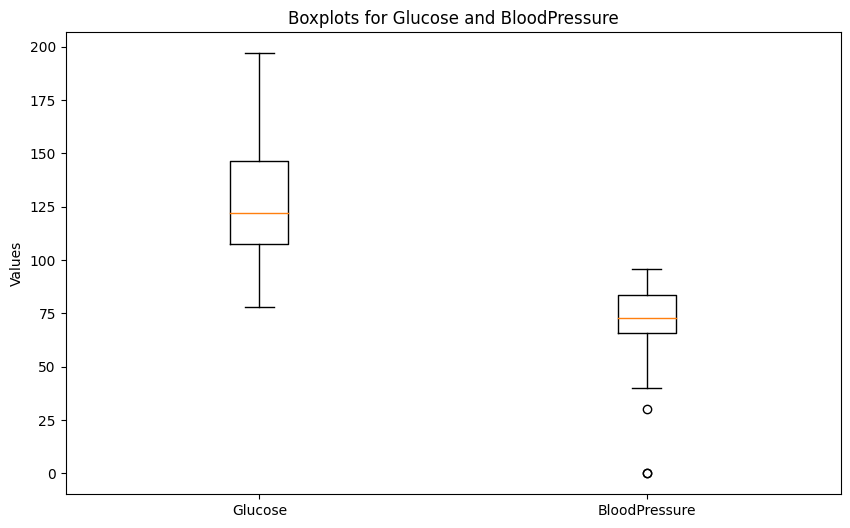

In [13]:
#Question no 1
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel('original_diabetes.xlsx')

# Define a function to calculate the mean of a list of numbers
def calculate_mean(data):
    return sum(data) / len(data)

# Define a function to calculate the variance of a list of numbers
def calculate_variance(data):
    mean = calculate_mean(data)
    return sum((x - mean) ** 2 for x in data) / len(data)

# Define a function to calculate the standard deviation of a list of numbers
def calculate_std_dev(data):
    return calculate_variance(data) ** 0.5

# Define a function to calculate the z-scores of a list of numbers
def calculate_z_scores(data):
    mean = calculate_mean(data)
    std_dev = calculate_std_dev(data)
    return [(x - mean) / std_dev for x in data]

# Define a function to calculate the quartiles of a list of numbers
def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    q1 = sorted_data[n // 4]
    q2 = sorted_data[n // 2]
    q3 = sorted_data[(3 * n) // 4]
    return q1, q2, q3

# Extracting the "Glucose" and "BloodPressure" columns from the DataFrame
glucose_data = df['Glucose'].dropna().tolist()
blood_pressure_data = df['BloodPressure'].dropna().tolist()

# Calculating statistics for "Glucose"
glucose_mean = calculate_mean(glucose_data)
glucose_variance = calculate_variance(glucose_data)
glucose_std_dev = calculate_std_dev(glucose_data)
glucose_z_scores = calculate_z_scores(glucose_data)
q1, median, q3 = calculate_quartiles(glucose_data)

# Calculating statistics for "BloodPressure"
bp_mean = calculate_mean(blood_pressure_data)
bp_variance = calculate_variance(blood_pressure_data)
bp_std_dev = calculate_std_dev(blood_pressure_data)
bp_z_scores = calculate_z_scores(blood_pressure_data)
bp_q1, bp_median, bp_q3 = calculate_quartiles(blood_pressure_data)

# Print the calculated statistics for "Glucose"
print('Statistics for Glucose:')
print(f"Mean: {glucose_mean}")
print(f"Variance: {glucose_variance}")
print(f"Standard Deviation: {glucose_std_dev}")
print(f"Z-Scores: {glucose_z_scores}")
print(f"Q1: {q1}, Median (Q2): {median}, Q3: {q3}")
print()

# Print the calculated statistics for "BloodPressure"
print("Statistics for BloodPressure:")
print(f"Mean: {bp_mean}")
print(f"Variance: {bp_variance}")
print(f"Standard Deviation: {bp_std_dev}")
print(f"Z-Scores: {bp_z_scores}")
print(f"Q1: {bp_q1}, Median (Q2): {bp_median}, Q3: {bp_q3}")
print()

# Plotting boxplots for "Glucose" and "BloodPressure" in one frame
plt.figure(figsize=(10, 6))
plt.boxplot([glucose_data, blood_pressure_data], labels=["Glucose", "BloodPressure"])
plt.title("Boxplots for Glucose and BloodPressure")
plt.ylabel("Values")
plt.show()


In [ ]:
#Question no 2
import numpy as np

def verify_Chebyshev_ineq(lst, k, mu=0, sigma=1):
    # Calculate the range
    lower_bound = mu - k*sigma
    upper_bound = mu + k*sigma

    # Count how many numbers are within the range
    count = sum(lower_bound <= x <= upper_bound for x in lst)

    # Calculate the probability
    prob = count / len(lst)

    return prob, count

# Create 50 random numbers from a normal distribution
mu = 10
sigma = 0.5
lst_normal = np.random.normal(mu, sigma, 50)

# Create 50 random numbers from a uniform distribution
lst_uniform = np.random.uniform(-20, 20, 50)

# Testcases
for lst in [lst_normal, lst_uniform]:
    for k in [1, 2**0.5, 1.5, 2, 3]:
        prob, count = verify_Chebyshev_ineq(lst, k, mu, sigma)
        print(f'When k = {k}, Probability of |X-u| = {prob} ; 1-1/(k^2)= {1-1/k**2}')
        if prob >= 1-1/k**2:
            print(f'When k = {k} , P(|X-u|<k*sd)>=1-1/k^2 is True')
        else:
            print(f'When k = {k} , P(|X-u|<k*sd)>=1-1/k^2 is False')


When k = 1, Probability of |X-u| = 0.62 ; 1-1/(k^2)= 0.0
When k = 1 , P(|X-u|<k*sd)>=1-1/k^2 is True
When k = 1.4142135623730951, Probability of |X-u| = 0.76 ; 1-1/(k^2)= 0.5000000000000001
When k = 1.4142135623730951 , P(|X-u|<k*sd)>=1-1/k^2 is True
When k = 1.5, Probability of |X-u| = 0.76 ; 1-1/(k^2)= 0.5555555555555556
When k = 1.5 , P(|X-u|<k*sd)>=1-1/k^2 is True
When k = 2, Probability of |X-u| = 0.94 ; 1-1/(k^2)= 0.75
When k = 2 , P(|X-u|<k*sd)>=1-1/k^2 is True
When k = 3, Probability of |X-u| = 0.98 ; 1-1/(k^2)= 0.8888888888888888
When k = 3 , P(|X-u|<k*sd)>=1-1/k^2 is True
When k = 1, Probability of |X-u| = 0.02 ; 1-1/(k^2)= 0.0
When k = 1 , P(|X-u|<k*sd)>=1-1/k^2 is True
When k = 1.4142135623730951, Probability of |X-u| = 0.06 ; 1-1/(k^2)= 0.5000000000000001
When k = 1.4142135623730951 , P(|X-u|<k*sd)>=1-1/k^2 is False
When k = 1.5, Probability of |X-u| = 0.06 ; 1-1/(k^2)= 0.5555555555555556
When k = 1.5 , P(|X-u|<k*sd)>=1-1/k^2 is False
When k = 2, Probability of |X-u| = 0.0

b1 (slope): 141.21212121212122
b0 (intercept): -466.8787878787879
r (correlation coefficient): 0.943579551890278


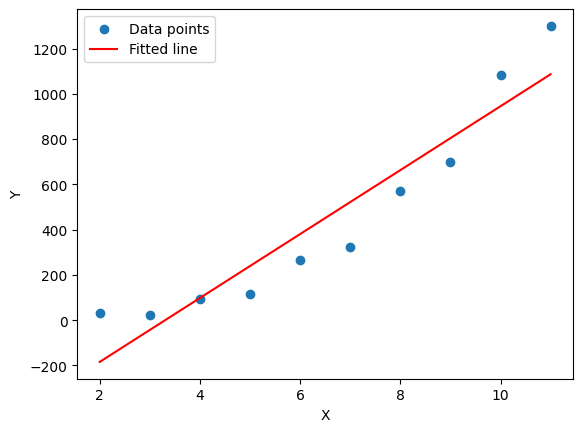

In [ ]:
#Question no 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Dataset
X = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
Y = np.array([30, 25, 95, 115, 265, 325, 570, 700, 1085, 1300])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(X,Y)

print(f"b1 (slope): {slope}")
print(f"b0 (intercept): {intercept}")
print(f"r (correlation coefficient): {r_value}")

# Plotting
plt.scatter(X,Y,label='Data points')
plt.plot(X,slope*X+intercept,color='red',label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()